In [1]:
#pip install --upgrade gensim

#### Word Embedding in Action -Word2Vec

- In word vector notation context is not considered for this purpose only word vector embeddings came up.
- Word Embeddings are vector representation of words. Thehy are used to create features from text which can be fed to Machine learning models or deep learning models.

#### 1. About the Dataset
###### The dataset that you are going to use is a collection of news articles from BBC across 5 major categories, namely:

- Business
- Entertainment
- Politics
- Sport
- Tech
###### There are a total of 2225 articles in the dataset, which is a mix of all of the above categories. Let's load the dataset using pandas and have a quick look at some of the articles.

In [1]:
import pandas as pd
import numpy as np

In [2]:
bbc_news=pd.read_csv("bbc_news_mixed.csv")

In [4]:
bbc_news.head()

,text,label
0,Cairn shares slump on oil setback\n\nShares in...,business
1,Egypt to sell off state-owned bank\n\nThe Egyp...,business
2,Cairn shares up on new oil find\n\nShares in C...,business
3,Low-cost airlines hit Eurotunnel\n\nChannel Tu...,business
4,"Parmalat to return to stockmarket\n\nParmalat,...",business


#### 2. Creating our own word2Vec model
- Word2Vec is an embedding that was developed at Google and have proven to be very effective in various NLP tasks.
- Gensim is a NLP library that provides an easier way to work with Word2Vec.

###### Preprocess text
- Gensim provides a utility simple_preprocess() that performs basic preprocessing such as lower casing the text, tokenizing and ignoring tokens that are too small(lenght of 2) or too big(length of 15) in the corpus.
- Note that you can choose these values(2 and 15) by passing the min_len and max_len parameters to the function.

In [3]:
from gensim.utils import simple_preprocess

In [6]:
print(simple_preprocess(bbc_news.text[0]))

['cairn', 'shares', 'slump', 'on', 'oil', 'setback', 'shares', 'in', 'cairn', 'energy', 'uk', 'oil', 'firm', 'have', 'closed', 'down', 'after', 'disappointing', 'drilling', 'update', 'and', 'warning', 'over', 'possible', 'tax', 'demands', 'the', 'company', 'said', 'tests', 'had', 'shown', 'no', 'significant', 'finds', 'in', 'one', 'of', 'its', 'indian', 'oil', 'fields', 'but', 'was', 'upbeat', 'about', 'the', 'potential', 'of', 'other', 'areas', 'it', 'also', 'said', 'the', 'indian', 'government', 'had', 'told', 'it', 'to', 'pay', 'production', 'tax', 'for', 'which', 'cairn', 'argues', 'it', 'is', 'not', 'liable', 'cairn', 'shares', 'have', 'jumped', 'by', 'almost', 'this', 'year', 'investors', 'had', 'piled', 'into', 'cairn', 'after', 'the', 'company', 'announced', 'significant', 'oil', 'finds', 'in', 'india', 'this', 'year', 'chief', 'executive', 'bill', 'gammell', 'said', 'on', 'friday', 'he', 'was', 'disappointed', 'with', 'exploration', 'in', 'the', 'so', 'called', 'extension', 'a

In [4]:
preprocessed_bbc=bbc_news.text.apply(lambda x: simple_preprocess(x))

###### Train Word2Vec

There are many parameters that can be utilized while training this model in gensim; some of the important ones are:

- size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- window: (default 5) The maximum distance between a target word and words around the target word.
- min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).
In the following case, I am using an embedding of size 300 and will be training a skip gram variant of word2vec which means given a center word, the model should be able to predict words that fall in the context of the center word.

In [5]:
from gensim.models import Word2Vec

In [6]:
w2v_model=Word2Vec(preprocessed_bbc,size=300,min_count=2,sg=1)

In [8]:
print("Vocabulary Size:",len(w2v_model.wv.vocab))

Vocabulary Size: 18588


In [11]:
###### Vocabulary
list(w2v_model.wv.vocab.items())

[('cairn', <gensim.models.keyedvectors.Vocab at 0x2045d799668>),
 ('shares', <gensim.models.keyedvectors.Vocab at 0x20460035198>),
 ('slump', <gensim.models.keyedvectors.Vocab at 0x20462df2240>),
 ('on', <gensim.models.keyedvectors.Vocab at 0x20462df2208>),
 ('oil', <gensim.models.keyedvectors.Vocab at 0x20462df2278>),
 ('setback', <gensim.models.keyedvectors.Vocab at 0x20462df22e8>),
 ('in', <gensim.models.keyedvectors.Vocab at 0x20462df2320>),
 ('energy', <gensim.models.keyedvectors.Vocab at 0x20462df2358>),
 ('uk', <gensim.models.keyedvectors.Vocab at 0x20462df2390>),
 ('firm', <gensim.models.keyedvectors.Vocab at 0x20462df23c8>),
 ('have', <gensim.models.keyedvectors.Vocab at 0x20462df2400>),
 ('closed', <gensim.models.keyedvectors.Vocab at 0x20462df2438>),
 ('down', <gensim.models.keyedvectors.Vocab at 0x20462df2470>),
 ('after', <gensim.models.keyedvectors.Vocab at 0x20462df24a8>),
 ('disappointing', <gensim.models.keyedvectors.Vocab at 0x20462df24e0>),
 ('drilling', <gensim.mode

###### Embedding of a given word
- Now that you have trained your own Word2Vec, we can fetch the embedding of a given word by the following way. Notice that each word will be represented by a vector of 300 dimensions because this is the paremeter you passed while training.

In [ ]:
print(" Shape of \'warning'\ vector",w2v_model.wv.get_vector("warning").shape)

 Shape of 'warning'\ vector (300,)


##### Find contextually similar words; given a target word
- Now since we have trained the Word2Vec model, we can easily utilize this model to predict a list of words that are most similar to a given word based on it's context in the corpus.

In [ ]:
wrd_india=w2v_model.wv.most_similar("india")
print(wrd_india)

[('china', 0.8851111531257629), ('telecom', 0.8733469247817993), ('japanese', 0.87138831615448), ('telecoms', 0.8619540929794312), ('banking', 0.8506698608398438), ('steel', 0.8460361957550049), ('booming', 0.8450103998184204), ('growing', 0.8427501916885376), ('japan', 0.8373072743415833), ('indonesia', 0.8359313011169434)]


##### Why to train your own embedding?
- While you will learn in further sections that Google also provides a pre-trained Word2Vec that you can utilize for a project, there are some benefits of training your own model too.
- One of them is that the word vectors would be derived from your dataset, so if you have reason to believe that the composition of your data is significantly different from the corpus used for the pre-trained vectors then that may result in better performance.
- A good example would be if you are trying to build a model on Medical related data wherein there can be many terminilogies that won't be present in Word2Vec's training corpus then you'd surely have to train the model on your own corpus.
- A thing to keep in mind while deciding is that training your own model is usually time and compute heavy.

### 3. Visualising Word2Vec embeddings

One of the most effective ways of understanding how word embeddings like Word2Vec work is to visualize them on a graph. Now that you have a newly trained Word2Vec model, you will go ahead and try to plot the same on a graph and then compare how do they work.

In [ ]:
words_music=w2v_model.wv.most_similar("music")
words_oil=w2v_model.wv.most_similar("oil")
words_football=w2v_model.wv.most_similar("rugby")

In [ ]:
words=words_football+words_music+words_oil
words=list(map(lambda x: x[0],words))

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
def plot_w2(words):
    x=w2v_model[words]
    pca=PCA(n_components=2)
    result=pca.fit_transform(x)
    plt.figure(figsize=(20,8))
    plt.scatter(result[:,0],result[:,1])
    for i,n in enumerate(words):
        plt.annotate(n,xy=(result[i,0],result[i,1]))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


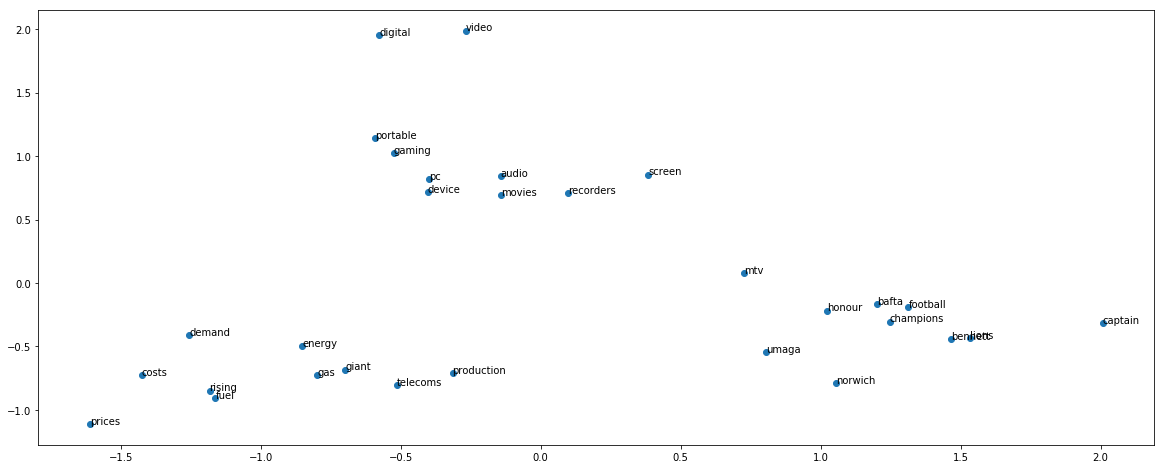

In [ ]:
plot_w2(words)

##### Note:

- We have plotted word2vec of 3 topics: namely 'oil', 'music' and 'rugby'. Notice that all the words have roughly been aligned into 3 major clusters.
- Words like 'energy', 'fuel', 'gas' fall in the 'oil' cluster.
- Words like 'sound', 'audio', 'recorders' fall in the 'music' cluster.
- The above visualization gives an intution of how Word2Vec is able to give such good results by representing the words into higher dimensional vector space. What is the size of vector ? doubt to be asked?

### 4. Utilizing Google's pretrained model

- Training our own Word2Vec might be needed for some NLP problems but it comes with several overheads like computation power, need of a large training corpus and training time.
- Google has released a pre-trained Word2Vec model that has the advantage of being trained on Google's News data set of 3 million words.
- Most of the NLP tasks can be solved by using some variant of this pre-trained model. 

In [8]:
#import model to gensim

from gensim.models import KeyedVectors

file="GoogleNews-vectors-negative300.bin"
w2vec=KeyedVectors.load_word2vec_format(file,binary=True)

### Contextual relationship between words
- One of the impressive things about word2vec is it's ability to capture semantic relationship between words. That is the reason that you can do cool stuff like perform linear algebra on words and get an appropriate output. Have a look at the following example: airplane - fly + drive = car

- If you pass the left hand side of the above equation to the model, it will give the right handside. Which makes sense because what would you get if you remove the ability to fly from an airplane? And add the ability to drive? You would get a car!

- The underlying model is able to understand implicit relationship between airplane and fly and also how removing the medium of travel changes the machine used to travel.

- It is also able to understand how what fly is to airplane similarly drive is to a car.

In [9]:
w2vec.most_similar(positive=["airplane","fly"],negative=["drive"])

[('plane', 0.6743144989013672),
 ('airplanes', 0.6508703231811523),
 ('aircraft', 0.6493836641311646),
 ('planes', 0.646045446395874),
 ('jet', 0.6035366654396057),
 ('flight', 0.5894945859909058),
 ('flying', 0.5630162954330444),
 ('aircrafts', 0.5548670291900635),
 ('jets', 0.5508741140365601),
 ('airliner', 0.5483856201171875)]

In [10]:
print(w2vec.most_similar(positive=["Tokyo","India"],negative=["Japan"]))

[('Mumbai', 0.744290828704834), ('Delhi', 0.7397059202194214), ('Bangalore', 0.7138411998748779), ('Kolkata', 0.688793420791626), ('Hyderabad', 0.6649311780929565), ('Bombay', 0.6548542976379395), ('Chennai', 0.6476788520812988), ('Calcutta', 0.6343135833740234), ('Jaipur', 0.6257501840591431), ('Bengaluru', 0.6191655397415161)]


### 5. Text Classification using Word2Vec
- Let's now get back to our BBC News data set, here you are going to solve the same problem that was solved in Count Vector, TFIDF Representations of Text NB by using Word2Vec as a text feature.

- Word2Vec gives vector representation of individual words, in order to find the same for a statement or a document you can mean the vectors of it's words.
- This is what is being done in the get_embedding_w2v(). It iterates through all the words in a document/statement and extracts the vector for them if they are present in the vocabulary of the word2vec model.

In [18]:
def get_embedding_w2v(doc_tokens,pre_trained):
    embeddings=[]
        # if pre_trained = 1; use Google's model else use our own model
    if pre_trained:
        model=w2vec
     # iterate over tokens to extract their vectors 
    else:
        model=w2v_model
    for tok in doc_tokens:
        if tok in model.wv.vocab:
            embeddings.append(model.wv.word_vec(tok))
    return np.mean(embeddings,axis=0)

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
X_w2v_model=preprocessed_bbc.apply(lambda x: get_embedding_w2v(x,pre_trained=0))
X_w2v_model=pd.DataFrame(X_w2v_model.tolist())
lencod=LabelEncoder()
bbc_news.label=lencod.fit_transform(bbc_news.label)

In [33]:
y=bbc_news.label
x_wm_train,x_wm_test,y_wm_train,y_wm_test=train_test_split(X_w2v_model,y,random_state=42,test_size=0.2)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [54]:
gb=GaussianNB()
gb.fit(x_wm_train,y_wm_train)
pred1=gb.predict(x_wm_test)
print("{0:.2f}%".format(accuracy_score(y_wm_test,pred1)*100))

89.89%


In [58]:
from sklearn.model_selection import train_test_split
x_w2v=preprocessed_bbc.apply(lambda x:get_embedding_w2v(x,pre_trained=1))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [60]:
x_w2=pd.DataFrame(x_w2v.tolist())

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_w2,y,random_state=42,test_size=0.2)

In [69]:
gvgb=GaussianNB()
gvgb.fit(x_train,y_train)
pred=gvgb.predict(x_test)
print("{0:0.2f}%".format(accuracy_score(y_test,pred)*100))

92.81%


In [ ]:
#### Accuracy for Google's preatrained model is good because the model whcih we used have only limited vocabulary